In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler as sc

### sc().fit() 수행하면 데이터의 평균과 시그마 값을 산출
### sc().transform 수행하면 z값을 산출
### sc().fit_transform() 평균고 시그마 값을 산출하고 z값을 동시에 산출
### np.random.randn(10) 표준정규분포의 값 10개를 반환해주며 +- 3 사이의 값이 반환됨

In [3]:
sc1 = sc()
sc2 = sc()

In [8]:
n_samples = 10
height = 170 + 3 * np.random.randn(n_samples).round()
weight = 70 + 4 * np.random.randn(n_samples).round()

In [10]:
list(zip(height,weight))

[(170.0, 70.0),
 (173.0, 70.0),
 (170.0, 62.0),
 (167.0, 70.0),
 (167.0, 82.0),
 (170.0, 70.0),
 (170.0, 70.0),
 (170.0, 66.0),
 (167.0, 70.0),
 (167.0, 78.0)]

In [13]:
x= pd.DataFrame(list(zip(height,weight)), columns =['height','weight'])
x

,height,weight
0,170.0,70.0
1,173.0,70.0
2,170.0,62.0
3,167.0,70.0
4,167.0,82.0
5,170.0,70.0
6,170.0,70.0
7,170.0,66.0
8,167.0,70.0
9,167.0,78.0


In [18]:
x_std = pd.DataFrame(sc1.fit_transform(x),columns =['height','weight'])
x_std

,height,weight
0,0.468521,-0.150756
1,2.030259,-0.150756
2,0.468521,-1.658312
3,-1.093216,-0.150756
4,-1.093216,2.110579
5,0.468521,-0.150756
6,0.468521,-0.150756
7,0.468521,-0.904534
8,-1.093216,-0.150756
9,-1.093216,1.356801


### MinMaxScaler : 0 ~ 1
### MaxAbsScaler : -1 ~ +1
### RobustScaler : 이상치를 제거한 정규화 -3 ~ +3
### StandardScaler : 이상치를 포함한 정규화 -3 ~ +3
---
### np.random.randn : 표준 정규분포(평균 0, 편차 1) 데이터 반환
### np.random.normal : 정규분포(평균과 편차를 임의로 설정) 데이터 반환

In [44]:
from sklearn.preprocessing import MinMaxScaler as mm_std, MaxAbsScaler as ma_std, RobustScaler as rb_std

### 데이터 변환 실습 (정규화 이전)

<Axes: ylabel='Density'>

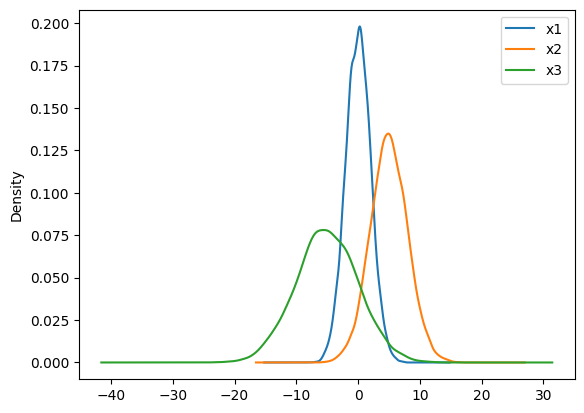

In [28]:
n_samples =10000
df = pd.DataFrame({'x1': np.random.normal(0, 2 ,n_samples),
 'x2': np.random.normal(5, 3, n_samples),
 'x3': np.random.normal(-5, 5, n_samples)})

df.plot.kde()

In [33]:
np.random.normal(0,2,10)

array([-0.80879816, -1.91844284,  1.51988579,  3.055313  , -1.65491859,
        0.18019908,  0.89610436, -1.38376017,  3.08577137,  1.01186293])

### 데이터 변환 실습 (정규화 이후) 

<Axes: ylabel='Density'>

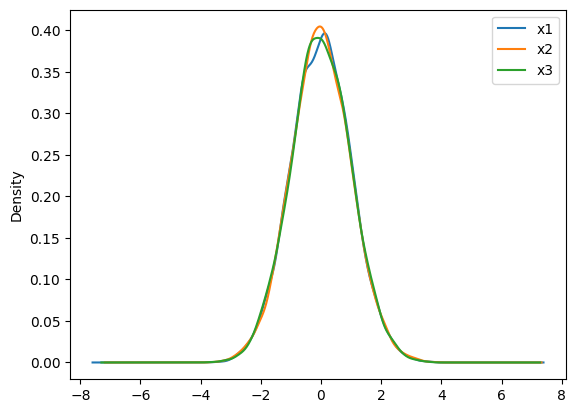

In [34]:
df_std = pd.DataFrame(sc1.fit_transform(df), columns = ['x1','x2','x3'])
df_std.plot.kde()

### MinMax Scaler 

<Axes: ylabel='Density'>

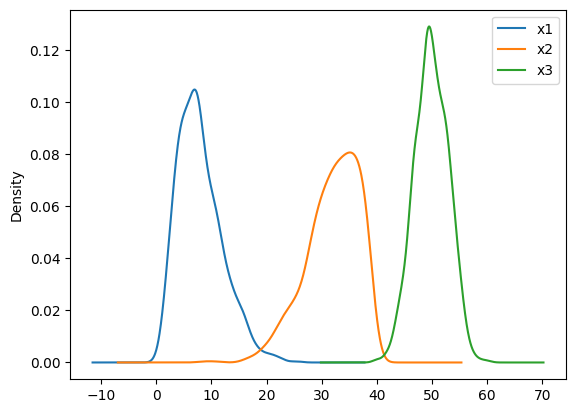

In [37]:
n_samples =1000
df = pd.DataFrame({'x1': np.random.chisquare(8 ,n_samples),
 'x2': np.random.beta(8,2, n_samples) * 40,
 'x3': np.random.normal(50, 3, n_samples)})

df.plot.kde()

<Axes: ylabel='Density'>

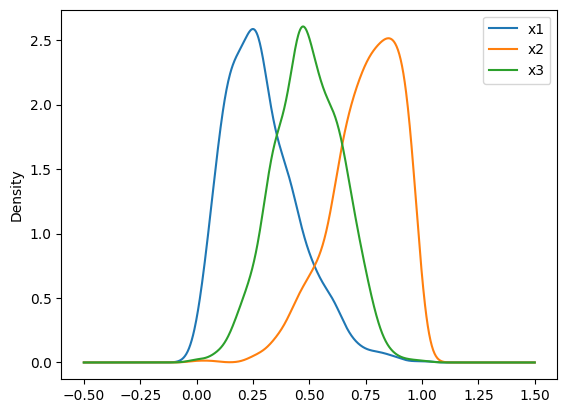

In [38]:
mmx = mm_std()
mmx_df = pd.DataFrame(mmx.fit_transform(df), columns = ['x1','x2','x3'])
mmx_df.plot.kde()

<Axes: ylabel='Density'>

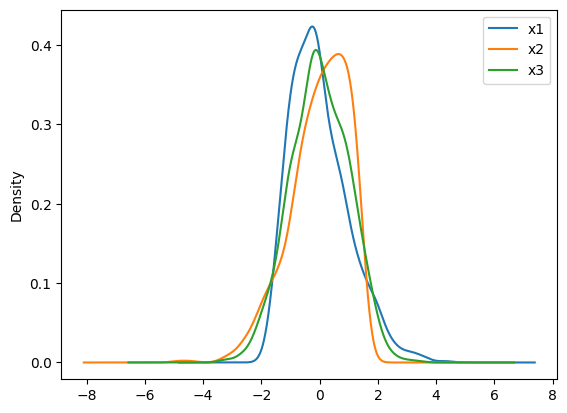

In [39]:
mmx = mm_std()
df_std = pd.DataFrame(sc1.fit_transform(df), columns = ['x1','x2','x3'])
df_std.plot.kde()

### Robust Scaler 

<Axes: ylabel='Density'>

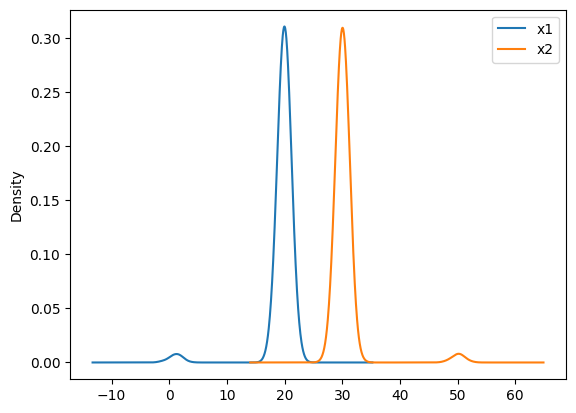

In [48]:
n_samples =1000
df = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20,1,1000),np.random.normal(1,1,25)]),
    'x2': np.concatenate([np.random.normal(30,1,1000),np.random.normal(50,1,25)])
    })

df.plot.kde()

<Axes: ylabel='Density'>

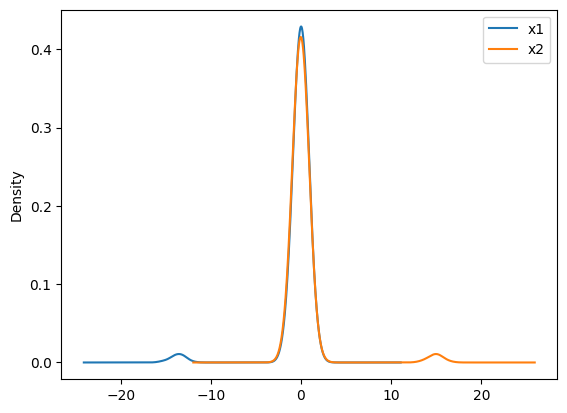

In [50]:
from sklearn.preprocessing import RobustScaler as rb_std
rb_std = rb_std()
robust_df = pd.DataFrame(rb_std.fit_transform(df), columns = ['x1','x2'])
robust_df.plot.kde()

<Axes: ylabel='Density'>

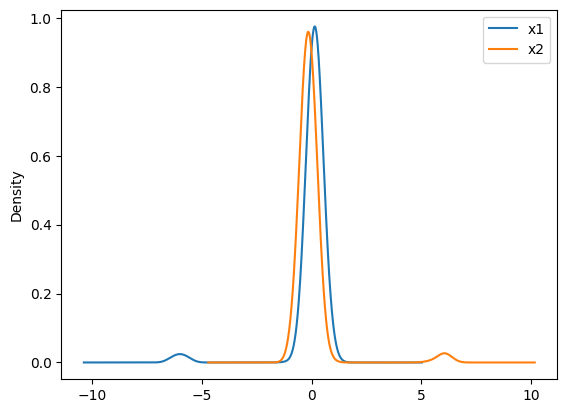

In [46]:
std_df = pd.DataFrame(sc1.fit_transform(df), columns = ['x1','x2'])
std_df.plot.kde()

### 범주형(category) 데이터 인코딩 

In [51]:
df = pd.DataFrame({
    'age':[33,44,22,44,55,22],
    'income':['low','low','high','medium','medium','high']
})
df

,age,income
0,33,low
1,44,low
2,22,high
3,44,medium
4,55,medium
5,22,high


In [54]:
df['income'].map({'low':1,'medium':2,'high':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: income, dtype: int64

In [55]:
df = pd.DataFrame({
    'age':[33,44,22,44,55,22],
    'gender':['male','female','male','female','male','male']
})
df

,age,gender
0,33,male
1,44,female
2,22,male
3,44,female
4,55,male
5,22,male


In [57]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [58]:
df['gender'].value_counts()

male      4
female    2
Name: gender, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [61]:
le = LabelEncoder()
df['gender_le'] = le.fit_transform(df['gender'])
df

,age,gender,gender_le
0,33,male,1
1,44,female,0
2,22,male,1
3,44,female,0
4,55,male,1
5,22,male,1


In [71]:
oh = OneHotEncoder()
oh.fit_transform(df[['gender_le']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [73]:
items = np.array(['tv','냉장고','컴퓨터','컴퓨터','냉장고','에어콘','에어콘','선풍기'])

In [74]:
pd.get_dummies(items)

,tv,냉장고,선풍기,에어콘,컴퓨터
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,1,0,0


### 텍스트데이터 전처리(변환)  : 숫자로 변환 - countvectorizser
#### CountVectorizer : 전체 문장중에 어떤 단어가 있는지 체크 > 각 단어에 index 부여 > 각 문장에 단어들이 몇번 발생하는지 표기
#### CountVectorizer.vocabulary_ : 단어별 인덱스 번호
#### CountVectorizer(stop_words = 불용어)
#### CountVectorizer(vocabulary = 변환할단어)
#### CountVectorizer(ngram_range = 말뭉치 수) - 여러 단어를 한 단어 합쳐서 변환할 때(최소 1개부터 최대 n개까지)

In [78]:
corpus = ['this is the first document awesome food',
         'this is the second second document',
          'and the third one the is mission impossoble',
         'is this the first document']
corpus

['this is the first document awesome food',
 'this is the second second document',
 'and the third one the is mission impossoble',
 'is this the first document']

In [79]:
df = pd.DataFrame({'text':corpus})
df

,text
0,this is the first document awesome food
1,this is the second second document
2,and the third one the is mission impossoble
3,is this the first document


In [81]:
from sklearn.feature_extraction.text import CountVectorizer 

In [87]:
s_words = ['the','is']
cv = CountVectorizer(stop_words = s_words)
cv.fit_transform(df['text']).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [86]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossoble': 5}

In [88]:
s_vocal = ['food','mission','second']
cv = CountVectorizer(vocabulary= s_vocal)
cv.fit_transform(df['text']).toarray()

array([[1, 0, 0],
       [0, 0, 2],
       [0, 1, 0],
       [0, 0, 0]], dtype=int64)

In [91]:
cv = CountVectorizer(ngram_range = (1, 2))
cv.fit_transform(df['text']).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [92]:
cv.vocabulary_

{'this': 28,
 'is': 10,
 'the': 21,
 'first': 6,
 'document': 4,
 'awesome': 2,
 'food': 8,
 'this is': 29,
 'is the': 12,
 'the first': 22,
 'first document': 7,
 'document awesome': 5,
 'awesome food': 3,
 'second': 18,
 'the second': 24,
 'second second': 20,
 'second document': 19,
 'and': 0,
 'third': 26,
 'one': 16,
 'mission': 14,
 'impossoble': 9,
 'and the': 1,
 'the third': 25,
 'third one': 27,
 'one the': 17,
 'the is': 23,
 'is mission': 11,
 'mission impossoble': 15,
 'is this': 13,
 'this the': 30}

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
s_words = ['english']
ttf = TfidfVectorizer(stop_words = s_words)
ttf.fit_transform(df['text']).toarray()

array([[0.        , 0.50118857, 0.31990217, 0.39514283, 0.50118857,
        0.        , 0.26154099, 0.        , 0.        , 0.        ,
        0.26154099, 0.        , 0.31990217],
       [0.        , 0.        , 0.27571196, 0.        , 0.        ,
        0.        , 0.22541259, 0.        , 0.        , 0.86391212,
        0.22541259, 0.        , 0.27571196],
       [0.39647615, 0.        , 0.        , 0.        , 0.        ,
        0.39647615, 0.2068977 , 0.39647615, 0.39647615, 0.        ,
        0.41379541, 0.39647615, 0.        ],
       [0.        , 0.        , 0.45349057, 0.56015108, 0.        ,
        0.        , 0.37075826, 0.        , 0.        , 0.        ,
        0.37075826, 0.        , 0.45349057]])

In [102]:
ttf.get_feature_names_out()

array(['and', 'awesome', 'document', 'first', 'food', 'impossoble', 'is',
       'mission', 'one', 'second', 'the', 'third', 'this'], dtype=object)